In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.metrics import mean_squared_error

# Уровень 0
*   диагональная, ортогональная, но не единичная

In [2]:
X = np.array([[1., 0.],
              [0., -1.]])

In [3]:
X # диагональная, не единичная

array([[ 1.,  0.],
       [ 0., -1.]])

In [4]:
# докажем, что ортогональная
X.dot(X.transpose())

array([[1., 0.],
       [0., 1.]])

*   верхнетреугольная, ортогональная

In [5]:
X # диагональная матрица является одновременно и верхнетреугольной (:

array([[ 1.,  0.],
       [ 0., -1.]])

*   нижнетреугольная, ортогональная

In [6]:
X # и нижнетреугольной (:

array([[ 1.,  0.],
       [ 0., -1.]])

*   матрица, у которой определитель = 1, и все элементы не равны 0

In [7]:
x = np.pi * np.random.random_sample()

In [8]:
x

2.3885985574138813

In [9]:
Y = np.array([[np.sin(x), np.cos(x)],
              [-np.cos(x), np.sin(x)]])

In [10]:
Y # все элементы ненулевые

array([[ 0.68382645, -0.7296447 ],
       [ 0.7296447 ,  0.68382645]])

In [11]:
np.linalg.det(Y) # det(Y) = sin(x)^2 + cos(x)^2 = 1 (:

1.0

Собственное значение и собственный вектор матрицы m.

In [12]:
m = np.array([[2., 2.],
              [1., 3.]])

In [13]:
m

array([[2., 2.],
       [1., 3.]])

Найдём собственные значения.

In [14]:
# det(np.array([[2 - w, 2], [2, 3 - w]])) = 0
# (2 - w) * (3 - w) - 2 = 0
# w^2 - 5w + 4 = 0
# w_1, w_2 = 1, 4

Найдём собственные вектора.

In [15]:
# w_1 = 1
# x + 2 * y = 0
# v_1 = (x, y) = (2, -1)

# w_2 = 4
# x - y = 0
# v_2 = (x, y) = (1, 1)

# Уровень 1
Спектральное разложение матрицы m.

In [16]:
m = np.array([[1., 2.],
              [2., 3.]])

In [17]:
m

array([[1., 2.],
       [2., 3.]])

Найдём собственные значения и собственные вектора m. Матрица, столбцы которой являются собственными векторами m, и будет матрицей S.

In [18]:
eigvals, eigvectors = np.linalg.eig(m)

In [19]:
eigvals

array([-0.23606798,  4.23606798])

In [20]:
eigvectors

array([[-0.85065081, -0.52573111],
       [ 0.52573111, -0.85065081]])

In [21]:
S = eigvectors.transpose()

In [22]:
S

array([[-0.85065081,  0.52573111],
       [-0.52573111, -0.85065081]])

In [23]:
D = np.diagflat(eigvals)

In [24]:
D

array([[-0.23606798,  0.        ],
       [ 0.        ,  4.23606798]])

Проверим, что произведение матриц S.transpose(), D и S действительно представляет собой матрицу m.

In [25]:
S.transpose().dot(D).dot(S)

array([[1., 2.],
       [2., 3.]])

In [26]:
m

array([[1., 2.],
       [2., 3.]])

Зависимость MSE на датасете MNIST (качества восстановления рукописных цифр после PCA) от n_components.

In [27]:
# загружаем данные
data, target = load_digits(return_X_y=True)

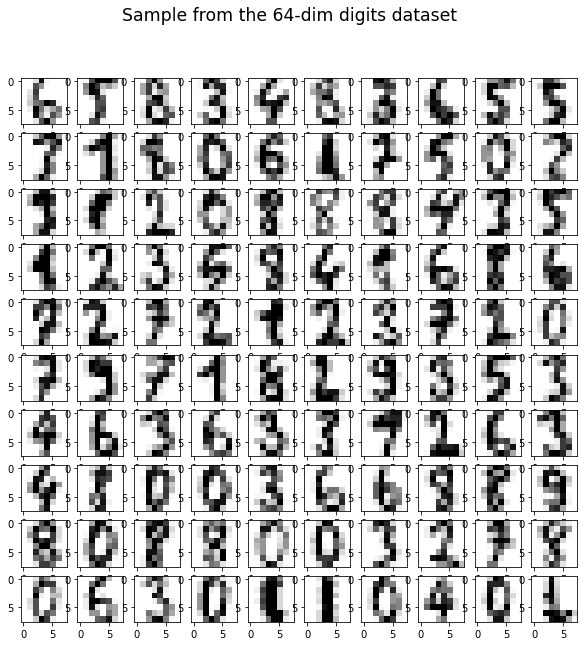

In [28]:
# визуализируем данные
digits_idx = np.random.randint(1797, size=100)
fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i, ax in zip(digits_idx, axs.flat):
    ax.imshow(data[i].reshape(8, 8), cmap='Greys')
fig.suptitle('Sample from the 64-dim digits dataset', fontsize='xx-large')
plt.show()

In [32]:
# подсчитываем mse для всех возможных значений n_components
scores = []
for n_components in tqdm(np.arange(1, 64 + 1)):
    pca = PCA(n_components=n_components, random_state=42)
    pca.fit(data)
    pred = pca.inverse_transform(pca.transform(data))
    mse = mean_squared_error(data, pred)
    scores.append(mse)
    print(f'n_components: {n_components}, mse: {mse:.3f}')

n_components: 1, mse: 15.978
n_components: 2, mse: 13.421
n_components: 3, mse: 11.207
n_components: 4, mse: 9.628
n_components: 5, mse: 8.542
n_components: 6, mse: 7.619
n_components: 7, mse: 6.809
n_components: 8, mse: 6.122
n_components: 9, mse: 5.492
n_components: 10, mse: 4.914
n_components: 11, mse: 4.469
n_components: 12, mse: 4.042
n_components: 13, mse: 3.700
n_components: 14, mse: 3.367
n_components: 15, mse: 3.092
n_components: 16, mse: 2.827
n_components: 17, mse: 2.580
n_components: 18, mse: 2.345
n_components: 19, mse: 2.154
n_components: 20, mse: 1.984
n_components: 21, mse: 1.817
n_components: 22, mse: 1.668
n_components: 23, mse: 1.524
n_components: 24, mse: 1.388
n_components: 25, mse: 1.257
n_components: 26, mse: 1.145
n_components: 27, mse: 1.037
n_components: 28, mse: 0.941
n_components: 29, mse: 0.849
n_components: 30, mse: 0.768
n_components: 31, mse: 0.698
n_components: 32, mse: 0.632
n_components: 33, mse: 0.568
n_components: 34, mse: 0.507
n_components: 35, ms

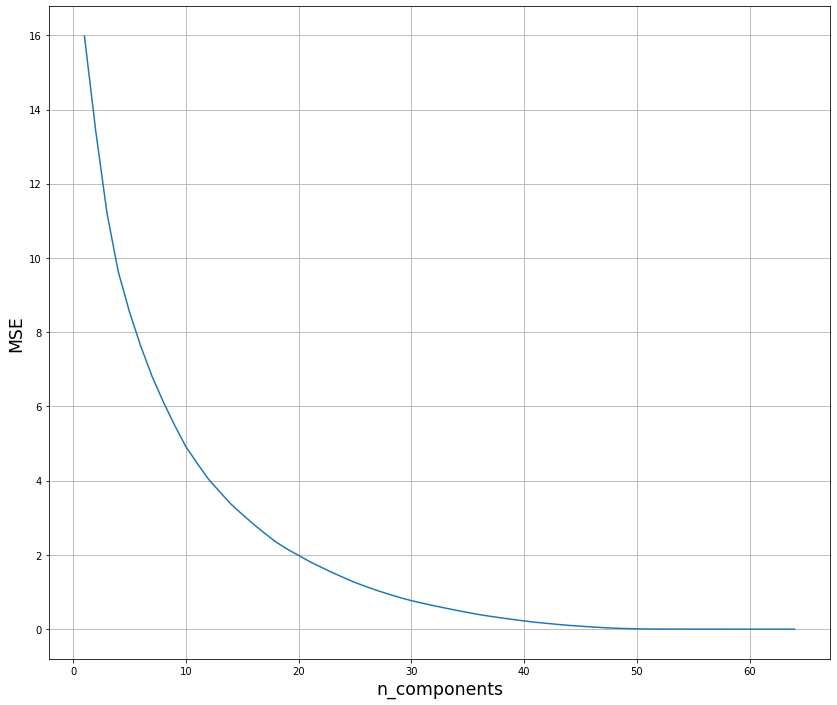

In [33]:
# строим график
plt.figure(figsize=(14, 12))
plt.plot(np.arange(1, 64 + 1), scores)
plt.grid()
plt.xlabel('n_components', fontsize='xx-large')
plt.ylabel('MSE', fontsize='xx-large')
plt.show()

Вывод: MSE пропорциональна 1 / n_components^2